## Inspecting the data

From the shapes obtained, we can deduce that the training dataset contains 72,247 samples, each being a grayscale image with dimensions 28x39 pixels. The test dataset contains 24,083 samples with the same dimensions, which is about 25% of the entire dataset. The corresponding labels are one-dimensional vectors with the same number of samples. The first value represents the number of double-digits, and the other two represent the height (28) and the width (39) as we can see in the plot.

x_train shape: (72247, 28, 39)
y_train shape: (72247,)
x_test shape: (24083, 28, 39)
y_test shape: (24083,)


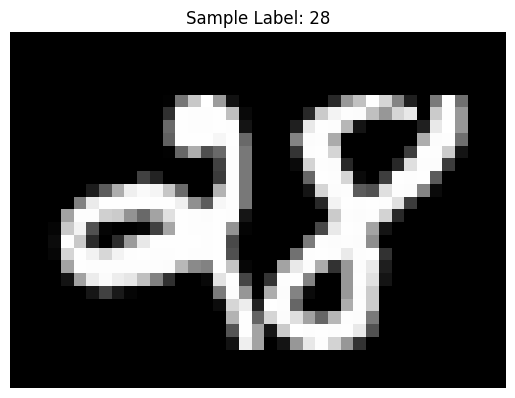

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

x_train_shape = x_train.shape
y_train_shape = y_train.shape
x_test_shape = x_test.shape
y_test_shape = y_test.shape

x_train_sample = x_train[0]
y_train_sample = y_train[0]

print(f"x_train shape: {x_train_shape}")
print(f"y_train shape: {y_train_shape}")
print(f"x_test shape: {x_test_shape}")
print(f"y_test shape: {y_test_shape}")

plt.imshow(x_train_sample, cmap='gray')
plt.title(f'Sample Label: {y_train_sample}')
plt.axis('off')
plt.show()

## Preparing the data

**Normalization:** Converted the image data to float32 format and normalized it by dividing by 255.0 to scale the pixel values to the range [0, 1]. Additionally, I flattened each image into a one-dimensional vector

**Dataset Splitting:** Split the training dataset into actual training and validation sets using an 80/20 ratio

**One-Hot Encoding of Labels:** Given that the labels represent a multi-class classification problem with 51 distinct classes (from 0 to 50), I used one-hot encoding to transform the categorical labels into a format suitable for classification models

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

x_train_flat = x_train.astype('float32').reshape((x_train.shape[0], -1)) / 255.0
x_test_flat = x_test.astype('float32').reshape((x_test.shape[0], -1)) / 255.0

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=42
)

# One-hot encoding
num_classes = np.max(y_train) + 1 
y_train_final_encoded = to_categorical(y_train_final, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

print(f"y_train_final_encoded shape: {y_train_final_encoded.shape}")
print(f"y_val_encoded shape: {y_val_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


y_train_final_encoded shape: (57797, 51)
y_val_encoded shape: (14450, 51)
y_test_encoded shape: (24083, 51)


## 1.1 Non-regularized Model


### 1.1.1 Building the network

#### **Network Structure**

- **Input Layer**:
  - The input layer is set up to match the flattened dimensionality of each image (28 x 39 pixels), which results in 1,092 input features.

- **Hidden Layers**:
  - The network comprises three dense hidden layers with 256, 128, and 64 neurons, respectively. This progressive reduction in the number of neurons allows the model to start with a high capacity for feature extraction at the initial layers and then reduce complexity as it moves deeper, which helps in focusing on essential patterns while preventing overfitting in later stages.
  - **Activation Function**: We used the Rectified Linear Unit (ReLU) activation function for all hidden layers. ReLU is widely adopted due to its ability to mitigate the vanishing gradient problem and its computational efficiency.
  
- **Output Layer**:
  - The output layer contains num_classes neurons with a softmax activation function. This setup is suitable for multi-class classification tasks as softmax generates a probability distribution across all classes, enabling the model to output the likelihood for each class.


- **Optimizer (Adam)**:
  - The Adam optimizer, with a learning rate of 0.0002, is selected for its adaptive learning rate capabilities, which help stabilize and accelerate the training process.


- **Loss Function (Categorical Crossentropy)**:
  -  The categorical crossentropy loss function is used to calculate the error between predicted and true class distributions. This is the standard choice for multi-class classification problems as it effectively penalizes incorrect predictions and encourages the model to assign high probabilities to the correct classes, optimizing overall accuracy.
  

- **Batch Size**:
  - The model was trained with a **batch size of 128**, which is commonly used in deep learning. This batch size strikes a balance between computational efficiency and stable updates to the model's parameters. Larger batch sizes could reduce the training time, but smaller batch sizes allow for more frequent updates, which can help the model converge better.

 - **Epochs**:
A value of 50 for epochs is okay for this tasks.

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model_without_regularization(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model_without_reg = build_model_without_regularization(
    input_shape=(28 * 39,), num_classes=num_classes)
model_without_reg.compile(optimizer=Adam(learning_rate=0.0002),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


history_without_reg = model_without_reg.fit(
    x_train_final, y_train_final_encoded,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val_encoded),
)



Epoch 1/50


452/452 [==============================] - 4s 5ms/step - loss: 1.8203 - accuracy: 0.5525 - val_loss: 0.9290 - val_accuracy: 0.7420
Epoch 2/50
452/452 [==============================] - 2s 5ms/step - loss: 0.7912 - accuracy: 0.7780 - val_loss: 0.7010 - val_accuracy: 0.8035
Epoch 3/50
452/452 [==============================] - 2s 5ms/step - loss: 0.6266 - accuracy: 0.8229 - val_loss: 0.6220 - val_accuracy: 0.8190
Epoch 4/50
452/452 [==============================] - 3s 6ms/step - loss: 0.5274 - accuracy: 0.8521 - val_loss: 0.5227 - val_accuracy: 0.8502
Epoch 5/50
452/452 [==============================] - 3s 6ms/step - loss: 0.4552 - accuracy: 0.8707 - val_loss: 0.4827 - val_accuracy: 0.8609
Epoch 6/50
452/452 [==============================] - 2s 5ms/step - loss: 0.3978 - accuracy: 0.8857 - val_loss: 0.4326 - val_accuracy: 0.8733
Epoch 7/50
452/452 [==============================] - 2s 5ms/step - loss: 0.3540 - accuracy: 0.8974 - val_loss: 0.3985 - val_accuracy: 0.8840
Epo

### 1.1.2 Analyze and comment on thetraining results

* The model without regularization performs well during the training phase, maintaining a good learning rate until halfway through the process, both loss curves show a small gap. This gap is caused by overfitting.
* There is also a gap in accuracy, which is relatively higher than the loss, indicating some overfitting.

In the next model, I will apply a regularization technique to mitigate the problem.

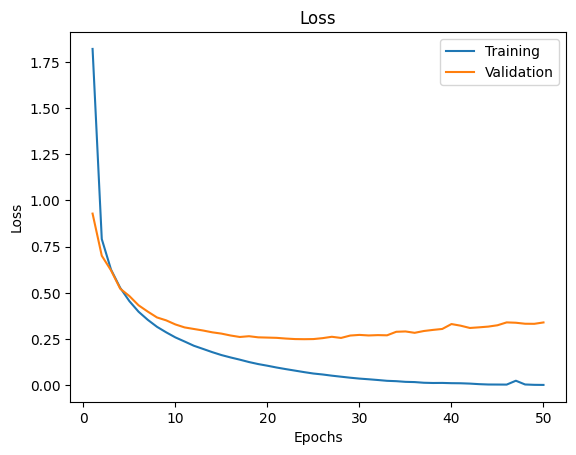

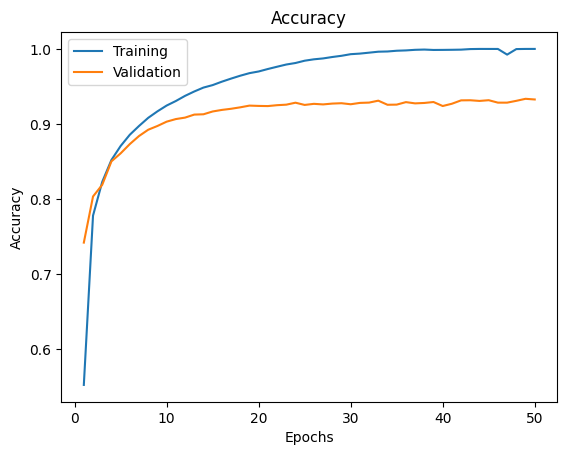

In [4]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history_without_reg)
plot_accuracy(history_without_reg)

### 1.1.3 Validate the model and comment on the results

The validation results indicate that while the model performs well on the training data, it shows signs of overfitting to the training set. The near zero training loss and very high training accuracy, coupled with a higher validation loss and lower validation accuracy, suggest that the model may be memorizing specific patterns in the training data rather than learning generalized features applicable to new data.

In [ ]:
from sklearn.metrics import classification_report

# Validate the model without regularization
val_loss_without_reg, val_accuracy_without_reg = model_without_reg.evaluate(x_val, y_val_encoded)
print(f"Validation Loss without Regularization: {val_loss_without_reg:.4f}")
print(f"Validation Accuracy without Regularization: {val_accuracy_without_reg:.4f}")

model_evaluate = model_without_reg.evaluate(x_val, y_val_encoded)

predictions = model_without_reg.predict(x_val)
predicted_y_val = predictions.argmax(axis=1)
true_y_val = y_val_encoded.argmax(axis=-1)

print(classification_report(true_y_val, predicted_y_val))

452/452 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.9327
Validation Loss without Regularization: 0.3399
Validation Accuracy without Regularization: 0.9327
452/452 [==============================] - 0s 867us/step
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       453
           2       0.83      0.87      0.85        63
           3       0.92      0.96      0.94       410
           4       0.95      0.95      0.95       386
           5       0.94      0.94      0.94       339
           6       0.94      0.91      0.92       143
           7       0.95      0.95      0.95       463
           8       0.76      0.79      0.78        96
           9       0.93      0.94      0.94       397
          10       0.96      0.96      0.96       438
          11       0.96      0.99      0.98       506
          12       0.91      0.94      0.93       151
          13       0.83      0.94      0.88        62

## Regularized Model
The model is quite the same, I decided to use `kernel_regularizer` as the regularization technique.

To address overfitting, L2 regularization is applied to each dense layer in the network. L2 regularization penalizes large weights by adding a term to the loss function proportional to the square of the weights’ magnitudes. This discourages the model from relying too heavily on any particular feature, promoting a more generalized learning process, which can reduce the risk of overfitting and improve the model’s generalization performance on unseen data.

In [6]:
def build_model_with_regularization(input_shape, num_classes, regularization):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu', kernel_regularizer=regularization),
        Dense(128, activation='relu', kernel_regularizer=regularization),
        Dense(64, activation='relu', kernel_regularizer=regularization),
        Dense(num_classes, activation='softmax', kernel_regularizer=regularization)
    ])
    return model

l2_regularization = l2(0.001)
model_with_reg = build_model_with_regularization(
    input_shape=(28 * 39,), num_classes=num_classes, regularization=l2_regularization)
model_with_reg.compile(optimizer=Adam(learning_rate=0.0002),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

history_with_reg = model_with_reg.fit(
    x_train_final, y_train_final_encoded,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val_encoded),
)


Epoch 1/50
452/452 [==============================] - 3s 5ms/step - loss: 2.4099 - accuracy: 0.5552 - val_loss: 1.4956 - val_accuracy: 0.7415
Epoch 2/50
452/452 [==============================] - 2s 4ms/step - loss: 1.3300 - accuracy: 0.7767 - val_loss: 1.2379 - val_accuracy: 0.7936
Epoch 3/50
452/452 [==============================] - 2s 4ms/step - loss: 1.1432 - accuracy: 0.8189 - val_loss: 1.1054 - val_accuracy: 0.8232
Epoch 4/50
452/452 [==============================] - 2s 4ms/step - loss: 1.0333 - accuracy: 0.8430 - val_loss: 1.0251 - val_accuracy: 0.8447
Epoch 5/50
452/452 [==============================] - 2s 4ms/step - loss: 0.9563 - accuracy: 0.8582 - val_loss: 0.9606 - val_accuracy: 0.8578
Epoch 6/50
452/452 [==============================] - 2s 4ms/step - loss: 0.8948 - accuracy: 0.8727 - val_loss: 0.9033 - val_accuracy: 0.8680
Epoch 7/50
452/452 [==============================] - 2s 4ms/step - loss: 0.8454 - accuracy: 0.8827 - val_loss: 0.8733 - val_accuracy: 0.8714
Epoch 

### Analyze and comment on the training results

The use of L2 regularization has had a noticeable effect on the training dynamics by constraining the model’s ability to overfit. The regularization term helps the model generalize better to the validation data, as evidenced by the closer alignment of the training and validation curves in both loss and accuracy plots. This improved stability in the validation metrics suggests that L2 regularization has succeeded in mitigating the overfitting observed in the model without regularization.

The regularized model achieves a slightly lower training accuracy than the non-regularized model but maintains comparable validation accuracy, which is a favorable trade-off for enhanced generalization.

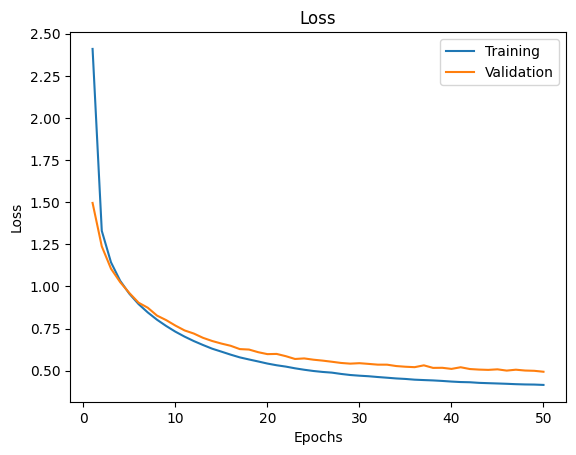

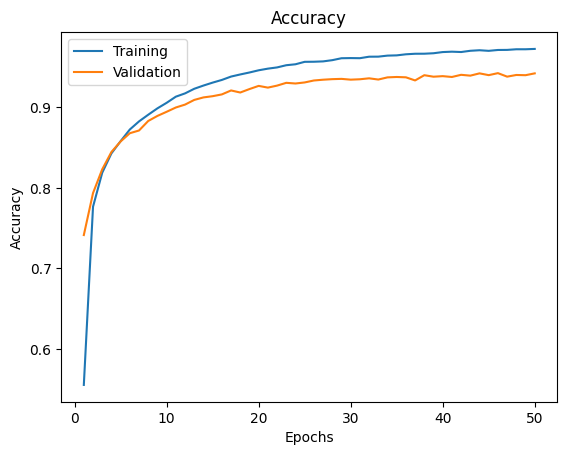

In [7]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history_with_reg)
plot_accuracy(history_with_reg)

### Validate the model and comment on the results

The loss and accuracy graphs from training, along with the validation metrics obtained here, suggest that the model with L2 regularization achieves a better generalization capability. Unlike the non-regularized model, which showed signs of overfitting as it memorized the training data, the regularized model avoids overfitting by maintaining a stable validation accuracy.

In [ ]:
# Validate the model with regularization
val_loss_with_reg, val_accuracy_with_reg = model_with_reg.evaluate(x_val, y_val_encoded)
print(f"Validation Loss with Regularization: {val_loss_with_reg:.4f}")
print(f"Validation Accuracy with Regularization: {val_accuracy_with_reg:.4f}")

model_evaluate = model_with_reg.evaluate(x_val, y_val_encoded)

predictions = model_with_reg.predict(x_val)
predicted_y_val = predictions.argmax(axis=1)
true_y_val = y_val_encoded.argmax(axis=-1)

print(classification_report(true_y_val, predicted_y_val))

452/452 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.9424
Validation Loss with Regularization: 0.4933
Validation Accuracy with Regularization: 0.9424
452/452 [==============================] - 0s 868us/step
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       453
           2       0.91      0.81      0.86        63
           3       0.93      0.94      0.93       410
           4       0.96      0.95      0.95       386
           5       0.92      0.94      0.93       339
           6       0.96      0.92      0.94       143
           7       0.94      0.96      0.95       463
           8       0.81      0.85      0.83        96
           9       0.92      0.94      0.93       397
          10       0.96      0.97      0.96       438
          11       0.97      0.99      0.98       506
          12       0.98      0.89      0.93       151
          13       0.88      0.82      0.85        62
     

## 1.3. Compare the performances of the two models (non-regularized and regularized) on the provided test set, visualize and comment on theresults

The non-regularized model achieved slightly higher test accuracy, but the regularized model (using L2 regularization) is expected to perform more consistently on an external test set. This is because regularization helps to reduce overfitting, enabling the model to generalize better to unseen data. Although the results between the two models were similar, the regularization techniques applied make the regularized model more robust.

The regularized model demonstrates better sensitivity for generalizing to new data, as shown by the classification metrics:

Precision: Measures the model's ability to distinguish between classes effectively.

Recall: Reflects how often the model correctly identifies true positives.

F1 Score: Provides a balanced metric between precision and recall, indicating the trade-off between false positives and false negatives.

753/753 [==============================] - 1s 923us/step - loss: 0.3261 - accuracy: 0.9352
Test Accuracy without Regularization: 0.9352
753/753 [==============================] - 1s 970us/step - loss: 0.4949 - accuracy: 0.9424
Test Accuracy with Regularization: 0.9424


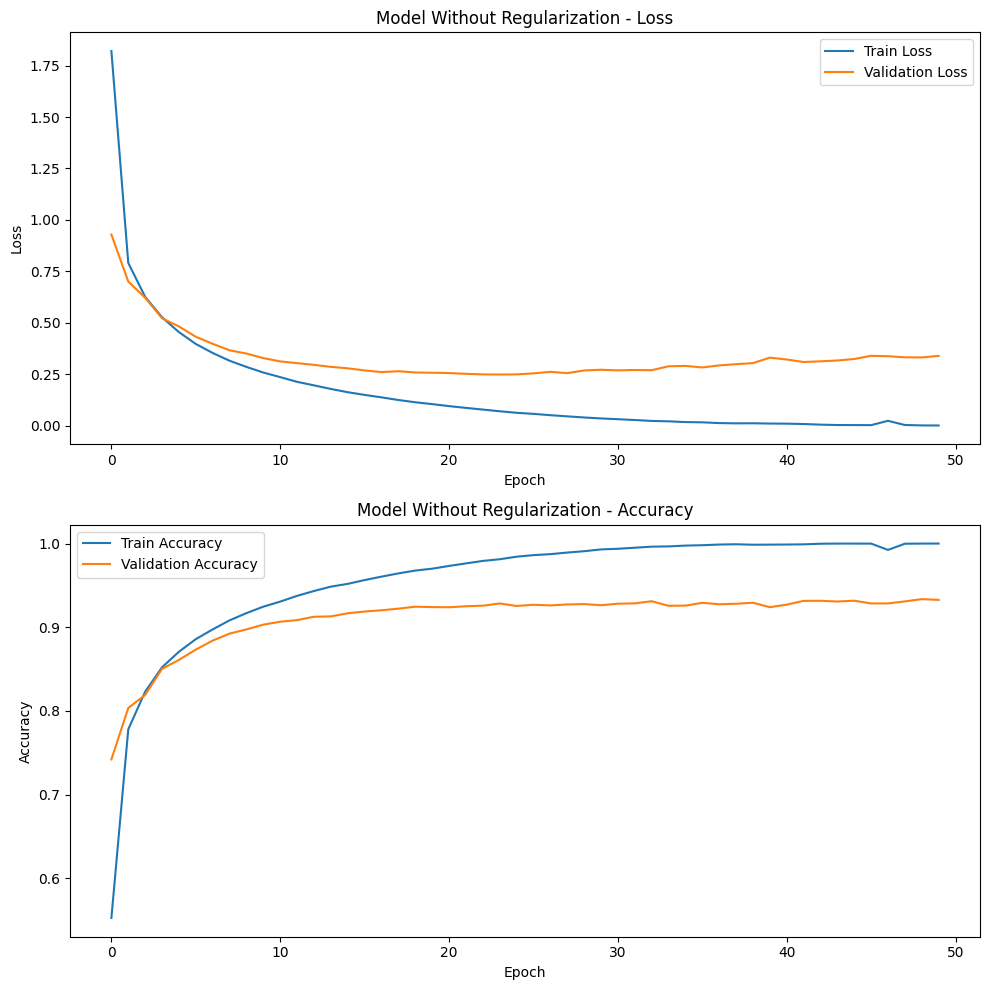

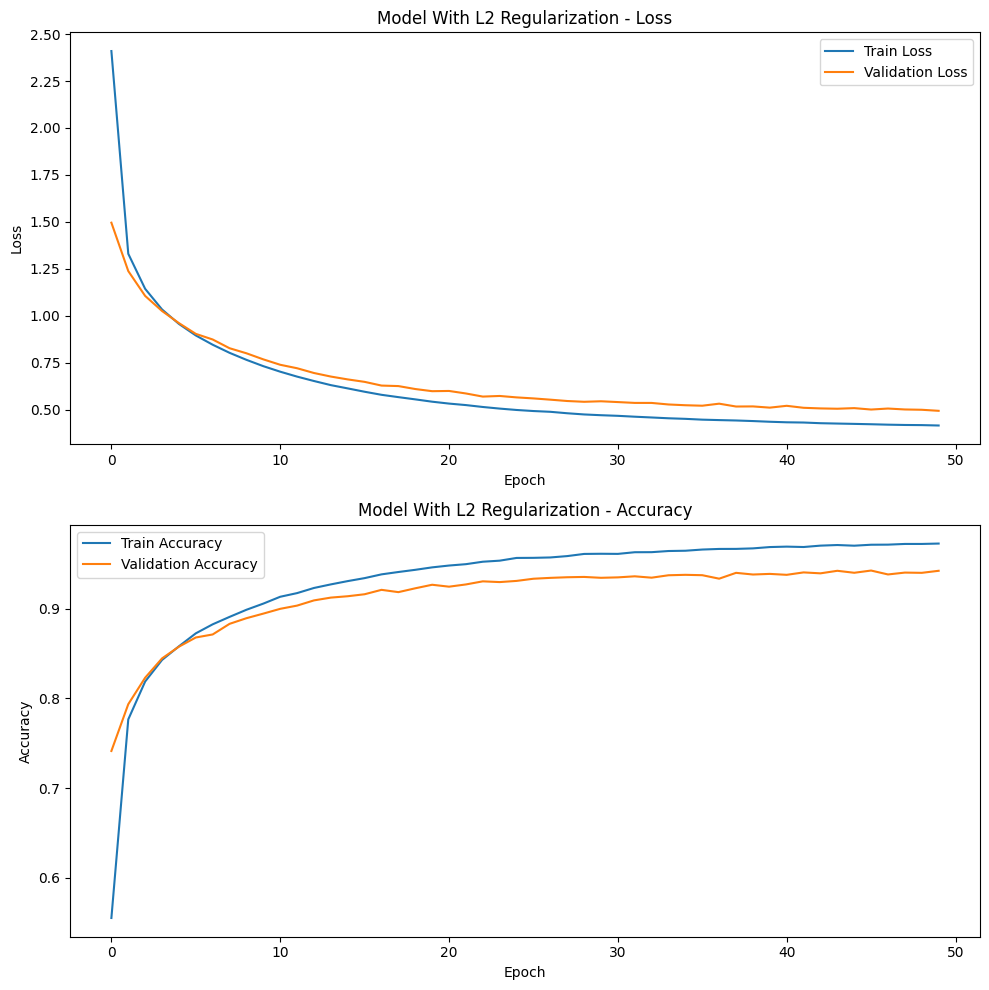

In [9]:
test_loss_without_reg, test_accuracy_without_reg = model_without_reg.evaluate(
    x_test_flat, y_test_encoded)
print(f"Test Accuracy without Regularization: {test_accuracy_without_reg:.4f}")

test_loss_with_reg, test_accuracy_with_reg = model_with_reg.evaluate(
    x_test_flat, y_test_encoded)
print(f"Test Accuracy with Regularization: {test_accuracy_with_reg:.4f}")

def plot_history(history, title):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title(f'{title} - Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(history.history['accuracy'], label='Train Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_history(history_without_reg, 'Model Without Regularization')
plot_history(history_with_reg, 'Model With L2 Regularization')


In [ ]:
from sklearn.metrics import classification_report

val_loss_without_reg, val_accuracy_without_reg = model_without_reg.evaluate(x_val, y_val_encoded)
print(f"Validation Loss without Regularization: {val_loss_without_reg:.4f}")
print(f"Validation Accuracy without Regularization: {val_accuracy_without_reg:.4f}")

predictions_without_reg = model_without_reg.predict(x_val)
predicted_y_val_without_reg = predictions_without_reg.argmax(axis=1)
true_y_val = y_val_encoded.argmax(axis=-1)

print("Classification Report without Regularization:")
print(classification_report(true_y_val, predicted_y_val_without_reg))

val_loss_with_reg, val_accuracy_with_reg = model_with_reg.evaluate(x_val, y_val_encoded)
print(f"Validation Loss with Regularization: {val_loss_with_reg:.4f}")
print(f"Validation Accuracy with Regularization: {val_accuracy_with_reg:.4f}")

predictions_with_reg = model_with_reg.predict(x_val)
predicted_y_val_with_reg = predictions_with_reg.argmax(axis=1)

print("Classification Report with Regularization:")
print(classification_report(true_y_val, predicted_y_val_with_reg))


452/452 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.9327
Validation Loss without Regularization: 0.3399
Validation Accuracy without Regularization: 0.9327
452/452 [==============================] - 0s 903us/step
Classification Report without Regularization:
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       453
           2       0.83      0.87      0.85        63
           3       0.92      0.96      0.94       410
           4       0.95      0.95      0.95       386
           5       0.94      0.94      0.94       339
           6       0.94      0.91      0.92       143
           7       0.95      0.95      0.95       463
           8       0.76      0.79      0.78        96
           9       0.93      0.94      0.94       397
          10       0.96      0.96      0.96       438
          11       0.96      0.99      0.98       506
          12       0.91      0.94      0.93       151
       

Based on the training and validation results, I anticipated that the L2 regularized model would demonstrate better generalization on a blind external test set compared to the non-regularized model. The L2 regularized model achieved more stable and aligned training and validation metrics, suggesting a reduced overfitting. I expected both models to perform well, given their high validation accuracies, but with the regularized model possibly showing more consistent performance on truly unseen data due to its more constrained learning.

The overall "best" model is the L2 regularized model. Although it achieved slightly lower accuracy on the test set than the non-regularized model, it demonstrated better alignment between training, validation, and test results, indicating improved generalization capability. This stability is crucial in real-world applications where the model must perform reliably on unseen data. The L2 regularization helps mitigate the risk of overfitting, making it the preferred choice for robustness.

For the L2 regularized model, the major sources of error likely arise from:

Ambiguities between Similar Classes: The model may struggle with classes that are visually similar or contain overlapping features, which is a common issue in multi-class classification tasks.

Imbalanced Class Distribution: If certain classes have fewer samples in the training data, the model might not learn to classify these classes as accurately, leading to higher error rates for underrepresented labels.

Complexity of Certain Data Samples: Samples with noisy or complex backgrounds, low contrast, or unusual features can increase the likelihood of misclassification.

The model is likely to struggle with classes that are visually similar or ambiguous, as well as any classes with insufficient representation in the training data. These issues could lead to confusion between certain classes, causing misclassifications. Additionally, samples with complex or unique features that differ significantly from the majority of training examples may also be challenging for the model.

## 2.1 Building the network

#### **Structure**

- **Input Layer**:
  - The input dimension is determined by the flattened training data shape (input_dim = 1092), representing a 28x39 pixel grayscale image.

- **Encoder:**:
  - The encoder part of the model is composed of four dense layers with progressively smaller dimensions (512, 256, 128, and encoding_dim). The encoding dimension is calculated as input_dim / compression_factor, resulting in a dimension of 43. This value was chosen to achieve a significant reduction while still retaining sufficient information to reconstruct the original data.

  - **Activation Function**: We used the Rectified Linear Unit (ReLU) activation function. ReLU is widely adopted due to its ability to mitigate the vanishing gradient problem and its computational efficiency.
  
- **Decoder**:
  - The decoder is a mirror image of the encoder, with dense layers that progressively increase in size (128, 256, 512, and finally back to the original input_dim). The final output layer uses a sigmoid activation function, which is appropriate for reconstructing pixel values that are normalized between 0 and 1, ensuring that the reconstructed values are in the same range as the input.

- **Autoencoder Model**:
  - The autoencoder combines both the encoder and decoder, taking the input data, compressing it to a latent representation, and then reconstructing the input data from this representation.


- **Optimizer (Adam)**:
  - Adam optimizer was selected due to its adaptive learning rate properties, which help to stabilize and speed up the training process.


- **Loss Function (Binary Crossentropy)**:
  -  Binary Crossentropy Given that the input images are normalized to values between 0 and 1, binary crossentropy is well-suited for measuring the difference between the original input and the reconstructed output. The goal is to minimize this difference, ensuring that the autoencoder learns to reconstruct the input as accurately as possible.
  
- **Early Stopping**:
  - An early stopping callback was implemented to monitor the validation loss with a patience of 5 epochs. This ensures that training stops if the model stops improving on the validation set, preventing overfitting and reducing unnecessary computation. 

- **Batch Size**:
  - The model was trained with a **batch size of 256**. The batch size was chosen to strike a balance between computational efficiency and convergence stability.

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

input_dim = x_train_flat.shape[1]  
compression_factor = 25
encoding_dim = int(input_dim / compression_factor)  

print(f"Input dimension: {input_dim}")
print(f"Encoding dimension: {encoding_dim}")

def build_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_img = Input(shape=(input_dim,))
    encoded = Dense(512, activation='relu')(input_img)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    # Autoencoder Model
    autoencoder = Model(inputs=input_img, outputs=decoded)
    
    # Encoder Model
    encoder = Model(inputs=input_img, outputs=encoded)
    
    return autoencoder, encoder

autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Input dimension: 1092
Encoding dimension: 43

Epoch 1/50
226/226 [==============================] - 5s 15ms/step - loss: 0.3160 - val_loss: 0.2488
Epoch 2/50
226/226 [==============================] - 3s 14ms/step - loss: 0.2275 - val_loss: 0.2112
Epoch 3/50
226/226 [==============================] - 3s 14ms/step - loss: 0.2035 - val_loss: 0.1957
Epoch 4/50
226/226 [==============================] - 3s 14ms/step - loss: 0.1915 - val_loss: 0.1867
Epoch 5/50
226/226 [==============================] - 3s 14ms/step - loss: 0.1836 - val_loss: 0.1817
Epoch 6/50
226/226 [==============================] - 3s 14ms/step - loss: 0.1784 - val_loss: 0.1763
Epoch 7/50
226/226 [==============================] - 3s 13ms/step - loss: 0.1745 - val_loss: 0.1735
Epoch 8/50
226/226 [==============================] - 3s 13ms/step - loss: 0.1709 - val_loss: 0.1699
Epoch 9/50
226/226 [==============================] - 3s 14ms/step - loss: 0.1680 - val_loss: 0.1671
Epoch 10/50
226/226 [========================

## 2.2 Visually Inspecting the results

The plot shows both training loss and validation loss converging and closely following each other throughout the training process. This indicates that the model is generalizing well to unseen data, with no significant overfitting or underfitting.

*Observations:*

Convergence: The training and validation loss curves are very close to each other, suggesting that the model is learning effectively without memorizing the training data. This is a good indication of stable training.

Smooth Decline: Both losses decrease smoothly and stabilize towards the end, implying that the model has reached a good convergence point and is not showing signs of divergence.

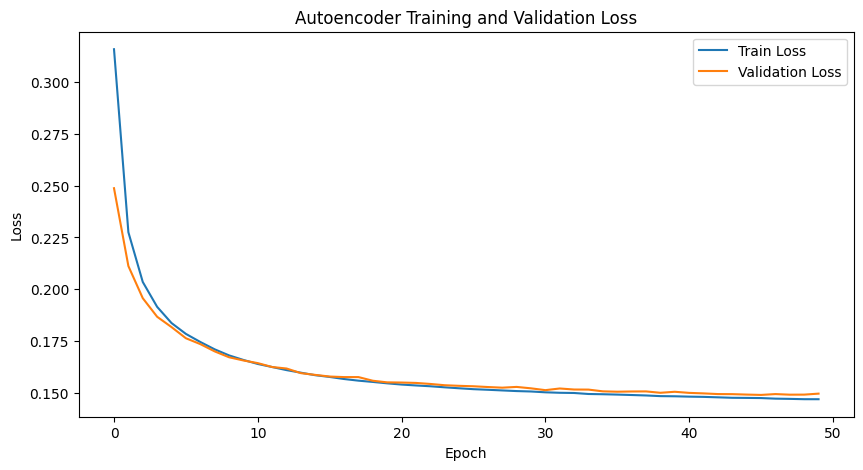

In [11]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Visually, I can observe that the reconstruction quality is high when compared to the source images. To quantify this, I calculated the Structural Similarity Index (SSIM) between the original and reconstructed images. The average SSIM score is very high, indicating that the images have been reconstructed with good quality.

1/1 [==============================] - 0s 167ms/step


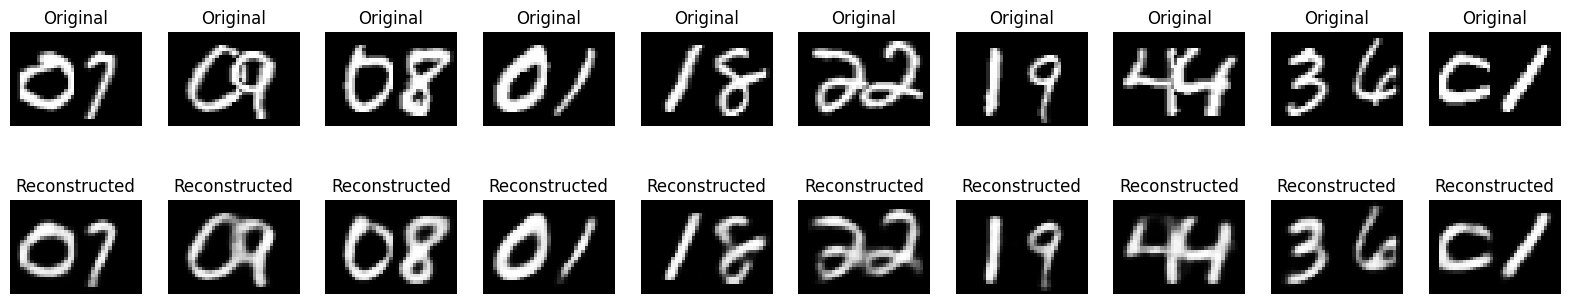

In [ ]:
n = 10  
samples = x_test_flat[:n]

reconstructed_images = autoencoder.predict(samples)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(samples[i].reshape(28, 39), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 39), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim

ssim_scores = []
for i in range(len(samples)):
    original = x_test_flat[i].reshape(28, 39)
    reconstructed = reconstructed_images[i].reshape(28, 39)
    score = ssim(original, reconstructed, data_range=reconstructed.max() - reconstructed.min())
    ssim_scores.append(score)

average_ssim = np.mean(ssim_scores)
print("Average SSIM on Test Set:", average_ssim)

Average SSIM on Test Set: 0.8930382374561674


The blurring from reconstruction often leads to misclassification, especially for poorly written or ambiguous digits, as it loses important details needed for correct classification.

In some cases, reconstruction helped correct the predictions (e.g., True: 39, Pred: 34 changed to Pred (Reconstructed): 39), suggesting that the autoencoder simplified noisy features. In other instances, reconstruction led to different but still incorrect predictions due to increased blurring.

Most misclassifications involve low-quality digits or overlapping shapes, which remain challenging even after reconstruction. Improving the autoencoder ability to retain fine details could enhance model performance on these samples.

452/452 [==============================] - 0s 922us/step


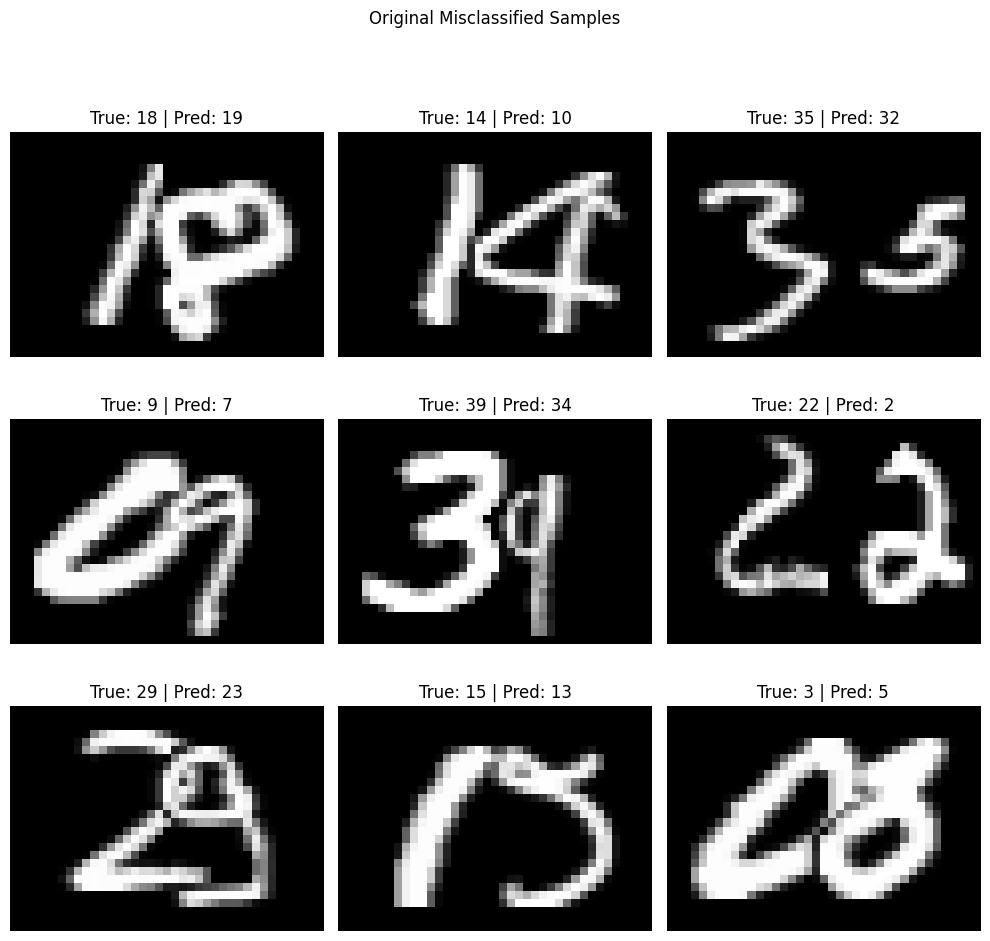

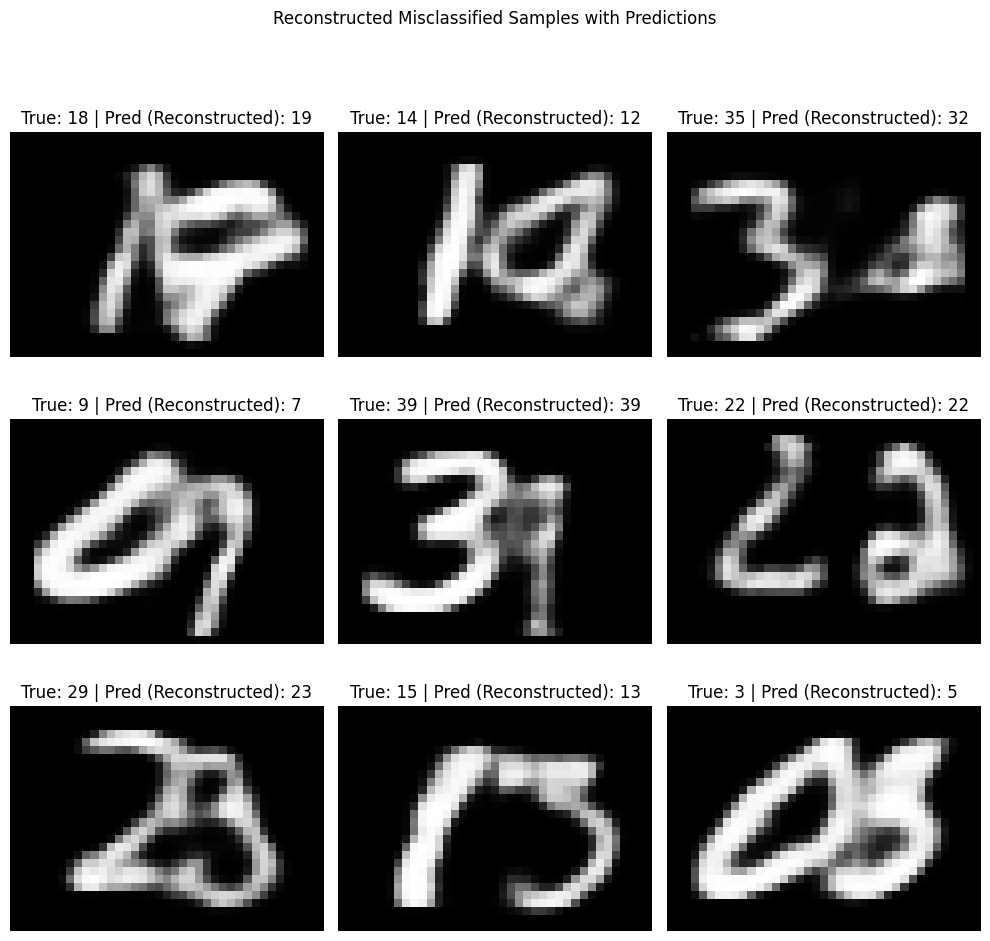

In [ ]:
x_val_reconstructed = autoencoder.predict(x_val)

y_pred_original = model_with_reg.predict(x_val)
y_pred_classes = np.argmax(y_pred_original, axis=1)
y_true_classes = np.argmax(y_val_encoded, axis=1)

y_pred_reconstructed = model_with_reg.predict(x_val_reconstructed)
y_pred_classes_reconstructed = np.argmax(y_pred_reconstructed, axis=1)

misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for idx, ax in zip(misclassified_idx[:9], axes.ravel()):
    # Original Image
    ax.imshow(x_val[idx].reshape(28, 39), cmap='gray')
    ax.set_title(f'True: {y_true_classes[idx]} | Pred: {y_pred_classes[idx]}')
    ax.axis('off')

plt.suptitle('Original Misclassified Samples')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for idx, ax in zip(misclassified_idx[:9], axes.ravel()):
    # Reconstructed Image
    ax.imshow(x_val_reconstructed[idx].reshape(28, 39), cmap='gray')
    ax.set_title(f'True: {y_true_classes[idx]} | Pred (Reconstructed): {y_pred_classes_reconstructed[idx]}')
    ax.axis('off')

plt.suptitle('Reconstructed Misclassified Samples with Predictions')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 2.3 Generate new samples

The generated samples exhibit a reasonable level of quality and diversity, reflecting the variability of handwritten digits. However, some samples appear blurred or ambiguous, indicating that the generative model might benefit from further training or a more refined latent space structure to enhance the clarity and consistency of the generated digits.

1/1 [==============================] - 0s 55ms/step


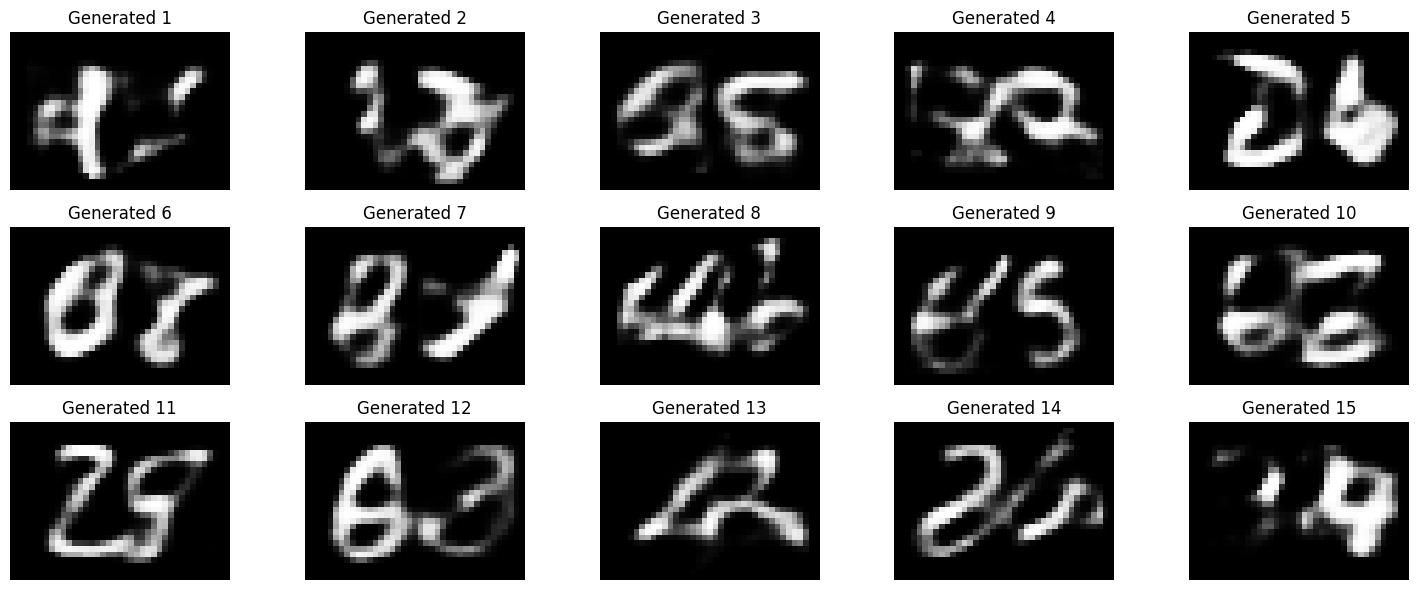

In [14]:
X_train_encoded = encoder.predict(x_train_flat)

encoding_mean = np.mean(X_train_encoded, axis=0)
encoding_std = np.std(X_train_encoded, axis=0)

# Generate random encodings
N = 15  
random_encodings = np.random.normal(loc=encoding_mean, scale=encoding_std, size=(N, encoding_dim))

encoded_input = Input(shape=(encoding_dim,))

# Reconstruct the decoder layers
decoder_layer = autoencoder.layers[-4](encoded_input)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_output = autoencoder.layers[-1](decoder_layer)

decoder = Model(encoded_input, decoder_output)

# Generate new samples
generated_images = decoder.predict(random_encodings)

generated_images_reshaped = generated_images.reshape(-1, 28, 39)

plt.figure(figsize=(15, 6))
for i in range(N):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(generated_images_reshaped[i], cmap='gray')
    plt.title(f"Generated {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# 3.A [OPTIONAL] The use and evaluation of the latent (encoded) representations generated by the auto-encoder to solve the problem of supervised classification.

To deal with the long fitting time for Random Forest on the original dataset, I applied Principal Component Analysis (PCA). This dimensionality reduction technique was used to reduce the feature space while retaining the majority of the variance in the data.

To quickly determine the appropriate number of principal components, I used n_components=0.90 for PCA. This parameter choice means that PCA will select enough components to retain 90% of the variance in the data, ensuring a balance between reducing dimensionality and retaining important information. This approach prevents the need for manually selecting an exact number of components.

The best performance was achieved using the Neural Network model from Section 1, with an accuracy of 0.9424, demonstrating its superior capability for this classification task.

The encoded representations and PCA-reduced data both resulted in similar accuracy (~0.77) and (~0.74), indicating that these methods are effective for dimensionality reduction but lead to some loss of discriminative power compared to the original dataset.

Random Forest on the original data (accuracy 0.8528) outperformed both PCA and encoded representations, suggesting that the full set of features provides a richer representation for the Random Forest model.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Encoded Representations
X_train_encoded = encoder.predict(x_train_flat)
X_test_encoded = encoder.predict(x_test_flat)

print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")

# Random Forest Encoded Data
rf_classifier_encoded = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_encoded.fit(X_train_encoded, y_train)
y_pred_encoded = rf_classifier_encoded.predict(X_test_encoded)
accuracy_encoded = accuracy_score(y_test, y_pred_encoded)
print(f"Test Accuracy with Encoded Representations: {accuracy_encoded:.4f}")

# Random Forest Original Data
rf_classifier_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_original.fit(x_train_flat, y_train)
y_pred_original = rf_classifier_original.predict(x_test_flat)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Test Accuracy with Original Data: {accuracy_original:.4f}")

# PCA 
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(x_train_flat)
X_test_pca = pca.transform(x_test_flat)
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy with PCA-reduced Data: {accuracy_pca:.4f}")

print("Performance Comparison:")
print(f"1. Best Neural Network Model (Section 1): {test_accuracy_with_reg:.4f}")
print(f"2. Random Forest on Encoded Data: {accuracy_encoded:.4f}")
print(f"3. Random Forest on Original Data: {accuracy_original:.4f}")
print(f"4. Random Forest on PCA-reduced Data: {accuracy_pca:.4f}")


753/753 [==============================] - 1s 1ms/step
X_train_encoded shape: (72247, 43)
X_test_encoded shape: (24083, 43)
Test Accuracy with Encoded Representations: 0.7764
Test Accuracy with Original Data: 0.8528
X_train_pca shape: (72247, 127)
X_test_pca shape: (24083, 127)
Test Accuracy with PCA-reduced Data: 0.7442
Performance Comparison:
1. Best Neural Network Model (Section 1): 0.9424
2. Random Forest on Encoded Data: 0.7764
3. Random Forest on Original Data: 0.8528
4. Random Forest on PCA-reduced Data: 0.7442
